In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import os
from sys import platform

 Table

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `test.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need: id and price
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [61]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [62]:
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
16290,16290,1.02,Ideal,H,SI1,58.8,57.0,6.66,6.6,3.9,8.48


In [63]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
7462,7462,0.71,Premium,D,SI1,61.0,61.0,5.82,5.75,3.53


In [64]:
df_train.shape

(40455, 11)

In [65]:
df_test.shape

(13485, 10)

In [66]:
#SUBMISSION -> test

In [67]:
print(df_train.shape[0])

40455


In [68]:
df_test.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

# Cleaning, processing, feature selection, etc

In [69]:
cut_dict = {'Good': 1,
            'Very Good': 2, 
            'Premium': 3, 
            'Ideal': 4, 
            'Fair': 5}
    
df_train["cut"] = df_train.cut.replace(cut_dict)
df_test["cut"] = df_test.cut.replace(cut_dict)

clarity_dict = {
            'I1': 1,
            'SI2': 2,
            'SI1': 3, 
            'VS2': 4, 
            'VS1': 5, 
            'VVS2': 6,
            'VVS1': 7,
            'IF': 8
            }
    
df_train["clarity"] = df_train.cut.replace(clarity_dict)
df_test["clarity"] = df_test.cut.replace(clarity_dict)
df_test.drop(columns="carat", inplace=True)
df_train.drop(columns="carat", inplace=True)
df_test.drop(columns="y", inplace=True)
df_train.drop(columns="y", inplace=True)
df_test.drop(columns="x", inplace=True)
df_train.drop(columns="x", inplace=True)
df_test.drop(columns="id", inplace=True)
df_train.drop(columns="id", inplace=True)
df_test.drop(columns="cut", inplace=True)
df_train.drop(columns="cut", inplace=True)

In [70]:
oneonehotencoder = preprocessing.OneHotEncoder()
df_train[["D","H","E","G","F","I","J"]] = oneonehotencoder.fit_transform(df_train[["color"]].values.reshape(-1, 1)).toarray()
df_test[["D","H","E","G","F","I","J"]] = oneonehotencoder.fit_transform(df_test[["color"]].values.reshape(-1, 1)).toarray()
df_train.drop(columns = ["color"], inplace=True)
df_test.drop(columns = ["color"], inplace=True)

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   clarity  13485 non-null  int64  
 1   depth    13485 non-null  float64
 2   table    13485 non-null  float64
 3   z        13485 non-null  float64
 4   D        13485 non-null  float64
 5   H        13485 non-null  float64
 6   E        13485 non-null  float64
 7   G        13485 non-null  float64
 8   F        13485 non-null  float64
 9   I        13485 non-null  float64
 10  J        13485 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.1 MB


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   clarity  40455 non-null  int64  
 1   depth    40455 non-null  float64
 2   table    40455 non-null  float64
 3   z        40455 non-null  float64
 4   price    40455 non-null  float64
 5   D        40455 non-null  float64
 6   H        40455 non-null  float64
 7   E        40455 non-null  float64
 8   G        40455 non-null  float64
 9   F        40455 non-null  float64
 10  I        40455 non-null  float64
 11  J        40455 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.7 MB


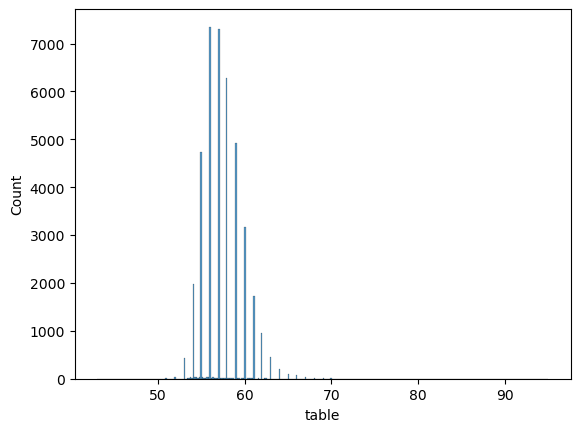

In [73]:
sns.histplot(x=df_train.table);

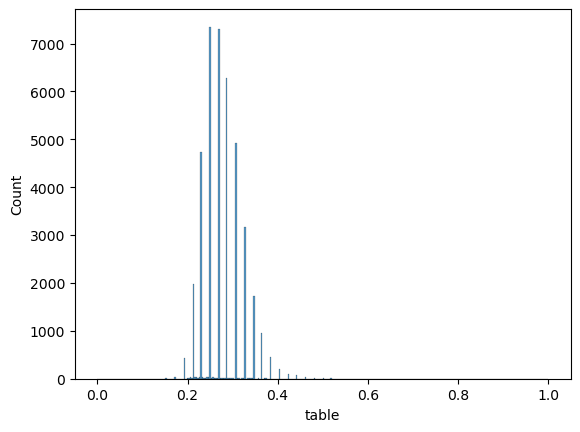

In [74]:
min_max_scaler = MinMaxScaler()
df_train["table"] = min_max_scaler.fit_transform(df_train["table"].values.reshape(-1, 1))
df_test["table"] = min_max_scaler.fit_transform(df_test["table"].values.reshape(-1, 1))
sns.histplot(x=df_train.table);

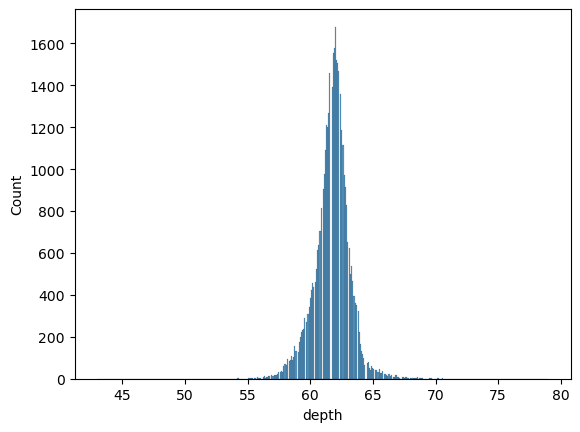

In [75]:
sns.histplot(x=df_train.depth);

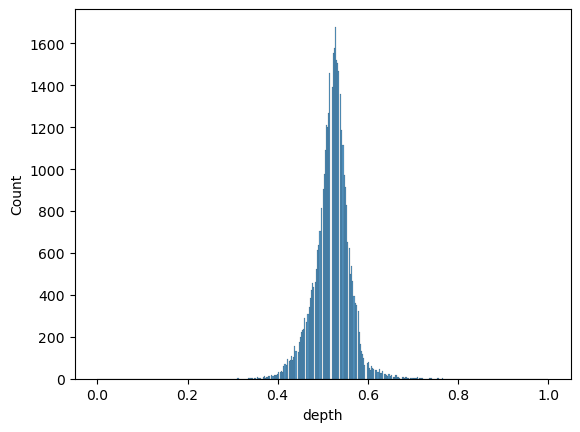

In [76]:
df_train["depth"] = min_max_scaler.fit_transform(df_train["depth"].values.reshape(-1, 1))
df_test["depth"] = min_max_scaler.fit_transform(df_test["depth"].values.reshape(-1, 1))
sns.histplot(x=df_train.depth);

In [77]:
# Processing is necessary, otherwise we won't be able to fit a model
# For the sake of the example, we'll just drop categorical columns

#df_train_cleaned = df_train.select_dtypes(exclude='object')
#print(df_train_cleaned.shape[0])
#df_train_cleaned 

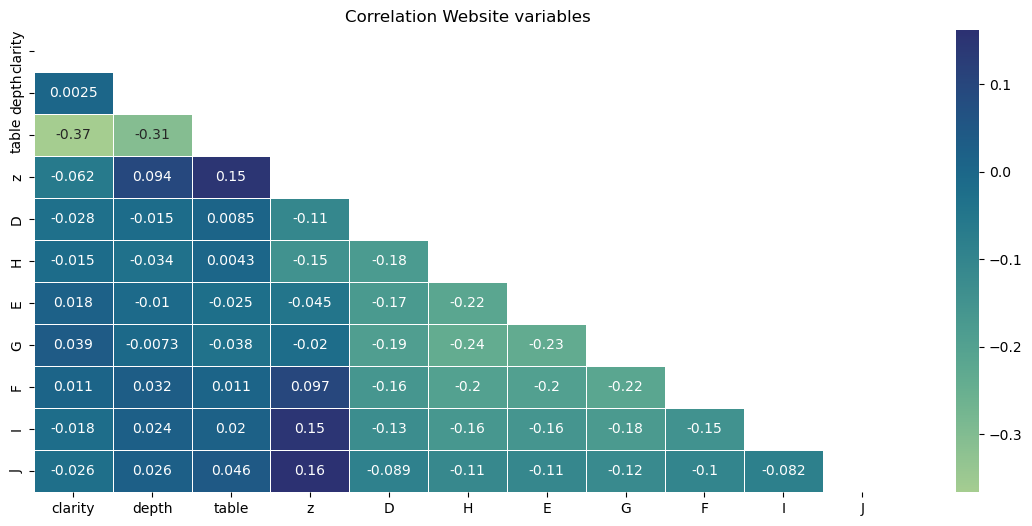

In [78]:
corrt = df_test.corr()

def heatmap_titanic ():
    plt.figure(figsize=(14, 6))
    mask = np.triu(np.ones_like(df_test.corr()), k=0)
    plt.title("Correlation Website variables")
    sns.heatmap(df_test.corr(), annot=True, cmap='crest', linewidths=0.5, mask=mask)
    
heatmap_titanic()

# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

## Train, test split

In [79]:
X = df_train.iloc[:,:-1]
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

## Fit

In [82]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say I'm done training")

In [83]:
y_pred = regressor.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.6826360654729529e-15

-----
-----
-----
-----


# Applying same cleaning & processing to my `test.csv`

In [95]:
df_test_cleaned = df_test.select_dtypes(exclude='object')
print(df_test.shape[0])
df_test.sample()

13485


,clarity,depth,table,z,D,H,E,G,F,I,J
6833,4,0.525,0.37931,4.24,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Predict on the `test.csv`

In [96]:
y_pred = regressor.predict(df_test_cleaned)
y_pred

# Just for feedback
# if platform == "darwin":
#    os.system("say -v ayam don predictin")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- J
Feature names seen at fit time, yet now missing:
- price


# DF with two columns

In [ ]:
# print(df_test_cleaned.shape[0])
# df_test_cleaned.sample()

In [102]:
df_test['price'] = y_pred # Adding the predicted price
df_for_submission = df_test[["price"]] # Modifying for subnmission

ValueError: Length of values (14160) does not match length of index (13485)

In [ ]:
print(df_for_submission.shape[0])
df_for_submission.sample()

# Export (index=False)

In [ ]:
#df_for_submission.to_csv("my_submission.csv", index=False)

# Just for feedback
#if platform == "darwin":
#    os.system("say redi for submission")

In [ ]:
#df_for_submission.head()

In [ ]:
model_Elastic = ElasticNet()
model_Lasso = Lasso()
model_Ridge = Ridge()
model_Linear = LinearRegression()
model_SVR = SVR()
model_Gradient = GradientBoostingRegressor()
model_Random = RandomForestRegressor()
model_Decision = DecisionTreeRegressor()
model_Cat = CatBoostRegressor()
model_LGBMRegressor = LGBMRegressor()
model_XGBRegressor = XGBRegressor()
model_KNeighbors = KNeighborsRegressor()
models = [
  model_Elastic,
  model_Lasso,
  model_Ridge,
  model_Linear,
  model_SVR,
  model_Gradient,
  model_Random,
  model_Decision,
  model_Cat,
  model_LGBMRegressor,
  model_XGBRegressor,
  model_KNeighbors
]